# Part 1

# 1

In [1]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [3]:
from keras.layers import Input, Dense
from keras.models import Model
import matplotlib.pyplot as plt

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 32s 87ms/step - loss: 0.3111 - val_loss: 0.1730
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 34s 57ms/step - loss: 0.1613 - val_loss: 0.1374
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 16s 66ms/step - loss: 0.1357 - val_loss: 0.1261
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 13s 55ms/step - loss: 0.1248 - val_loss: 0.1248
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 21s 56ms/step - loss: 0.1184 - val_loss: 0.1130
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.1126 - val_loss: 0.1091
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 13s 54ms/step - loss: 0.1081 - val_loss: 0.1068
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 21s 55ms/step - loss: 0.1045 - val_loss: 0.1026
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 13s 55ms/step - loss: 0.1017 - val_loss: 0.1005
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 13s 55ms/step - loss: 0.0998 - val_loss: 0.0983
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 13s 55ms/step - loss: 0.0980 - val_loss: 0.0965
Epoch 12/20
235/235 ━━━━━━━━━━

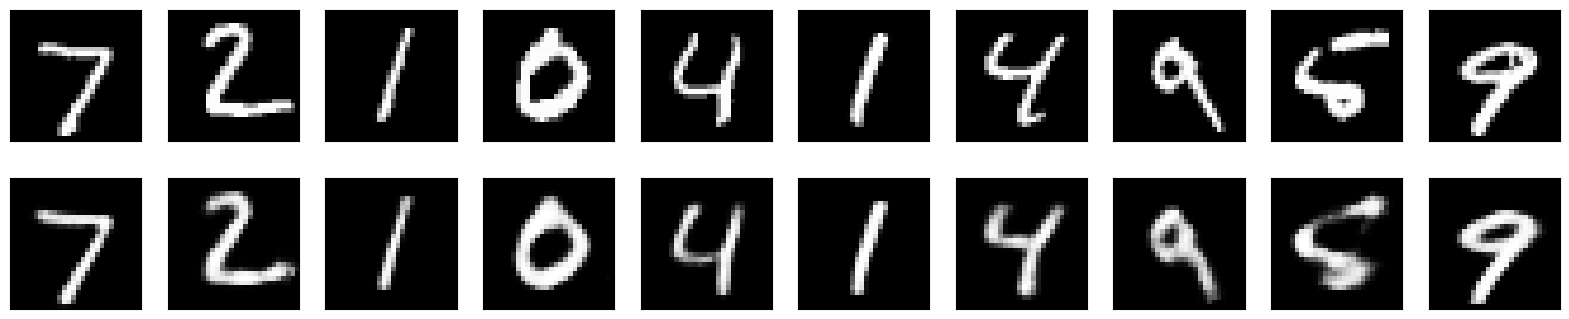

In [4]:
encoding_dim = 32

input_img = Input(shape=(784,))
encoded = Dense(512, activation='relu')(input_img)
encoded = Dense(256, activation='relu')(encoded)
encoded = Dense(128, activation='relu')(encoded)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(256, activation='relu')(decoded)
decoded = Dense(512, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

autoencoder = Model(input_img, decoded)

encoder = Model(input_img, encoded)
encoded_input = Input(shape=(32,))
decoder_layer1 = autoencoder.layers[-5]
decoder_layer2 = autoencoder.layers[-4]
decoder_layer3 = autoencoder.layers[-3]
decoder_layer4 = autoencoder.layers[-2]
decoder_layer5 = autoencoder.layers[-1]

decoder = Model(encoded_input,  (decoder_layer5(decoder_layer4(decoder_layer3(decoder_layer2(decoder_layer1(encoded_input)))))))


autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=20,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

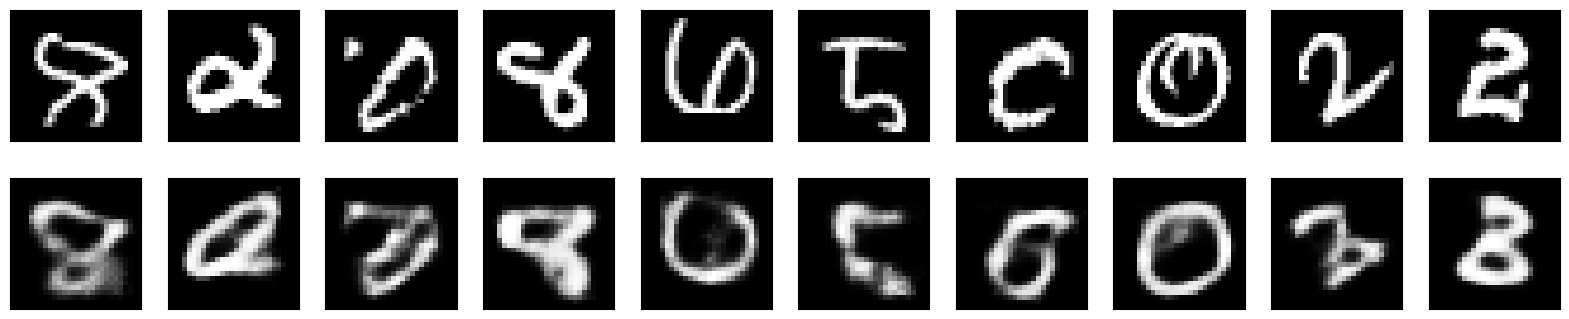

In [5]:
from sklearn.metrics import mean_squared_error

error = np.array([mean_squared_error(x_test[esh], decoded_imgs[esh]) for esh in range(len(x_test))])
sorted_errors = np.argsort(error)[::-1]
error10 = sorted_errors[:10]

n = 10
plt.figure(figsize=(20, 4))
sp = 0
for i in error10:
    ax = plt.subplot(2, n, sp + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, sp + 1 + n)
    sp +=1
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

The highest error image is on the left of the graph while the right is the 10th highest error. The highest error images are 8, 2, 0, 8, 6, 5, 0, 0, 2 and 0. This model can have a hard time reconstructing the numbers 8 and 2. It apppears that the model has difficulty reconstructing numbers with round or enclosed features. 8 has round features and enclosed features of the number so that may explain why the model struggles with it. The two 8s both seem to have the correct shape but are verry blurry.  The 2s have rounded features but also have lines that look to the model like it may be connected. Resulting in some 2 constructed to 8. The end dot makes it seem like an important feature even though from a human standpoint it is clearly noise. Moreover the first 0 also has a dot that is noise but the model views it as important trying to connect it. A 6 is reconstructed as a 0 likley due to its orientation. The bottom of the 5 may be too rounded and too close for the model as it is verry blurry. The 0 may have high error because it appears the model combined the overhang curves into the overall shape like the majority of the other 0s it was trained on.
In order to improve the model in the future it may be useful to train on images that are orientated differently. Noise may be difficult to reconstruct because the model needs to understand that the noise is not part of the number but it also needs to reconstruct it, it cannot disregard it during reconstructing because the purpose of the autoencoder model is to compress the data in this case. It may be beneficial to try different network layers instead of just dense layers such as convolution layers or inception block layers to improve the model performance.

# Part II


# 1

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
# make sure data1.csv is uploaded to local enviornment
df = pd.read_csv("/content/data1.csv")
print(df.head())
print(df.describe())

         V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V20       V21       V22       V23  \
0  0.098698  0.363787  0.090794  ...  0.251412 -0.018307  0.277838 -0.110474   
1  0.085102 -0.255425 -0.166974  ... -0.069083 -0.225775 -0.638672  0.101288   
2  0.247676 -1.514654  0.207643  ...  0.524980  0.247998  0.771679  0.909412   
3  0.377436 -1.387024 -0.054952  ... -0.208038 -0.108300  0.005274 -0.190321   
4 -0.270533  0.817739  0.753074  ...  0.408542 -0.009431  0.798278 -0.137458   

        V24       V25       V26       V27       V28  Class  
0  0.06

In [8]:
x = df.drop(["Class"], axis=1)
y = df["Class"]
x = np.array(x)
y = np.array(y)
x = x[:-3] # last 3 arrays are all NaN so drop it
y = y[:-3]
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = .1, random_state = 1)

In [9]:
encoding_dim = 2
input = Input(shape=(28,))

encoded = Dense(2, activation='relu')(input)
decoded = Dense(28, activation='sigmoid')(encoded)

autoencoder = Model(input, decoded)

encoder = Model(input, encoded)
encoded_input = Input(shape=(2,))
decoder_layer = autoencoder.layers[-1]

decoder = Model(encoded_input,  (decoder_layer(encoded_input)))

autoencoder.compile(optimizer='adam', loss='mean_squared_error')

autoencoder.fit(x_train, x_train,
                epochs=20,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

encoded = encoder.predict(x_test)
decoded = decoder.predict(encoded)


Epoch 1/20
1002/1002 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.2287 - val_loss: 1.0814
Epoch 2/20
1002/1002 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.0578 - val_loss: 1.0539
Epoch 3/20
1002/1002 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.0214 - val_loss: 1.0430
Epoch 4/20
1002/1002 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.0197 - val_loss: 1.0370
Epoch 5/20
1002/1002 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.0095 - val_loss: 1.0319
Epoch 6/20
1002/1002 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.0018 - val_loss: 1.0283
Epoch 7/20
1002/1002 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.0208 - val_loss: 1.0260
Epoch 8/20
1002/1002 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.0081 - val_loss: 1.0245
Epoch 9/20
1002/1002 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.0146 - val_loss: 1.0235
Epoch 10/20
1002/1002 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.0035 - val_loss: 1.0228
Epoch 11/20
1002/1002 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.0158 - val_loss: 1.0219
Epoch 12/20
1002/1002 ━━━━━━━━

In [10]:
error1 = []
for esh in range(len(x_test)):
  error1.append(mean_squared_error(x_test[esh], decoded[esh]))

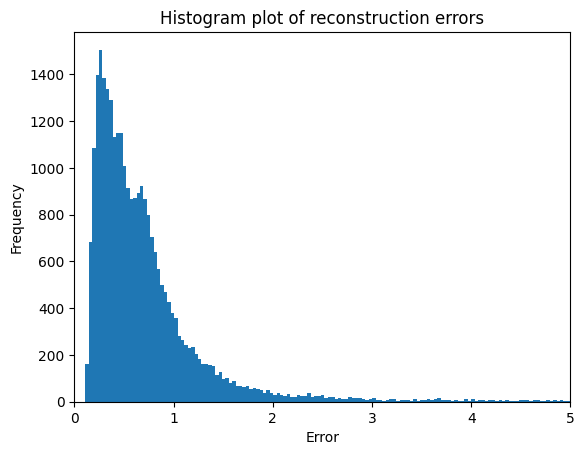

In [11]:
plt.hist(error1, bins=10000)
plt.title("Histogram plot of reconstruction errors")
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.xlim(0,5)
plt.show()

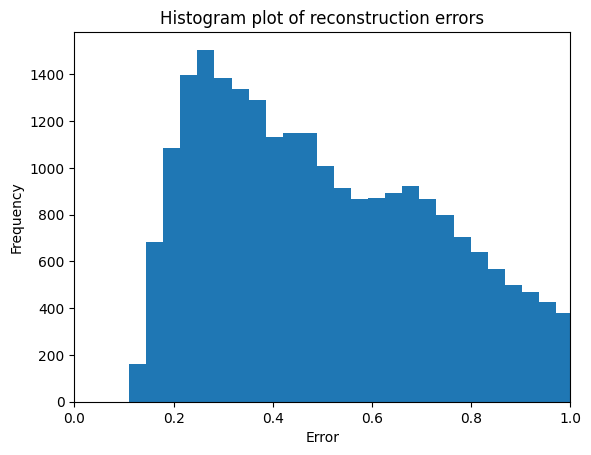

In [12]:
plt.hist(error1, bins=10000)
plt.title("Histogram plot of reconstruction errors")
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.xlim(0,1)
plt.show()

# 2

In [13]:
encoding_dim = 2

input = Input(shape=(28,))
encoded = Dense(16, activation='relu')(input)
encoded = Dense(8, activation='relu')(encoded)
encoded = Dense(4, activation='relu')(encoded)

encoded = Dense(2, activation='relu')(encoded)

decoded = Dense(4, activation='relu')(encoded)
decoded = Dense(8, activation='relu')(decoded)
decoded = Dense(16, activation='relu')(decoded)
decoded = Dense(28, activation='sigmoid')(decoded)

autoencoder = Model(input, decoded)

encoder = Model(input, encoded)
encoded_input = Input(shape=(encoding_dim,))
decoder_layer1 = autoencoder.layers[-4]
decoder_layer2 = autoencoder.layers[-3]
decoder_layer3 = autoencoder.layers[-2]
decoder_layer4 = autoencoder.layers[-1]

decoder = Model(encoded_input,  (decoder_layer4(decoder_layer3(decoder_layer2(decoder_layer1(encoded_input))))))

autoencoder.compile(optimizer='adam', loss='mean_squared_error')

autoencoder.fit(x_train, x_train,
                epochs=20,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

encoded = encoder.predict(x_test)
decoded = decoder.predict(encoded)


Epoch 1/20
1002/1002 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 1.1063 - val_loss: 1.0259
Epoch 2/20
1002/1002 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.9981 - val_loss: 1.0056
Epoch 3/20
1002/1002 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.9908 - val_loss: 0.9971
Epoch 4/20
1002/1002 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.9649 - val_loss: 0.9923
Epoch 5/20
1002/1002 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.9660 - val_loss: 0.9896
Epoch 6/20
1002/1002 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.9651 - val_loss: 0.9872
Epoch 7/20
1002/1002 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.9843 - val_loss: 0.9862
Epoch 8/20
1002/1002 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.9577 - val_loss: 0.9848
Epoch 9/20
1002/1002 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.9544 - val_loss: 0.9827
Epoch 10/20
1002/1002 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.9481 - val_loss: 0.9810
Epoch 11/20
1002/1002 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.9590 - val_loss: 0.9797
Epoch 12/20
1002/1002 ━━━━━━━━

In [14]:
error2 = []
for esh in range(len(x_test)):
  error2.append(mean_squared_error(x_test[esh], decoded[esh]))

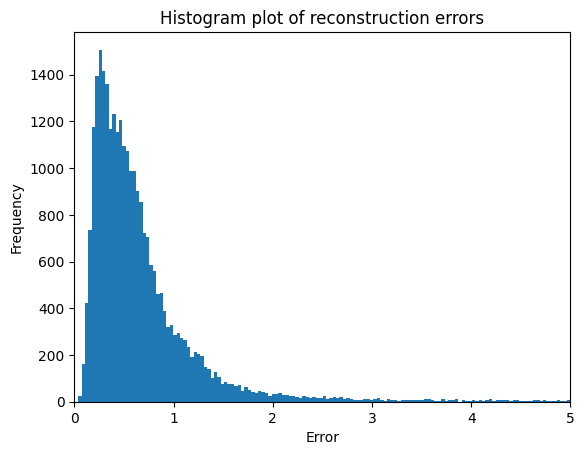

In [15]:
plt.hist(error2, bins=10000)
plt.title("Histogram plot of reconstruction errors")
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.xlim(0,5)
plt.show()

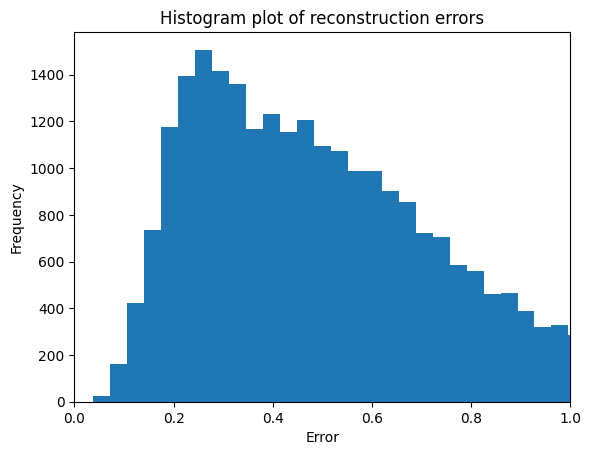

In [16]:
plt.hist(error2, bins=10000)
plt.title("Histogram plot of reconstruction errors")
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.xlim(0,1)
plt.show()

For the comparison of 1 layer autoencoder to 4 layer autoencoder histograms both errors are calculated using mean squared error. The plots look similar in the domain 0-5. However when restricting the domain further to 0-1, it appears that the single hidden layer has less predictions with higher errors. This was not expected since it is expected that numerical data would be harder to reconstruct than image data. However, there are much less inputs 28 compared to 784 which is why less neurons are needed. The 4 hidden layers were still expected to outperform the single layer but it did not. only 3 neuron layer did not appear to be enough to capture and reconstruct all 28 inputs. The 4 hidden layers may be overfitting the data to result in the slighly worse performance. The data may be able to represented with few neurons possibly due to a clear mathematical relationship that connects it and makes it more compressible. There are also higher errors for 4 layers past 1.0 as well. It is important to test variety of layers and neurons to test assumptions about the dataset.

# 3/4

In [17]:
encoding_dim = 2
input = Input(shape=(28,))

encoded = Dense(2, activation='relu')(input)
decoded = Dense(28, activation='sigmoid')(encoded)

#autoencoder = Model(input, decoded)

encoder1 = Model(input, encoded)


encoding_dim = 2

input = Input(shape=(28,))
encoded = Dense(16, activation='relu')(input)
encoded = Dense(8, activation='relu')(encoded)
encoded = Dense(4, activation='relu')(encoded)

encoded = Dense(2, activation='relu')(encoded)

decoded = Dense(4, activation='relu')(encoded)
decoded = Dense(8, activation='relu')(decoded)
decoded = Dense(16, activation='relu')(decoded)
decoded = Dense(28, activation='sigmoid')(decoded)

#autoencoder = Model(input, decoded)

encoder2 = Model(input, encoded)



hidden_layer_vector1 = encoder1.predict(x_test)
hidden_layer_vector2 = encoder2.predict(x_test)

891/891 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
891/891 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


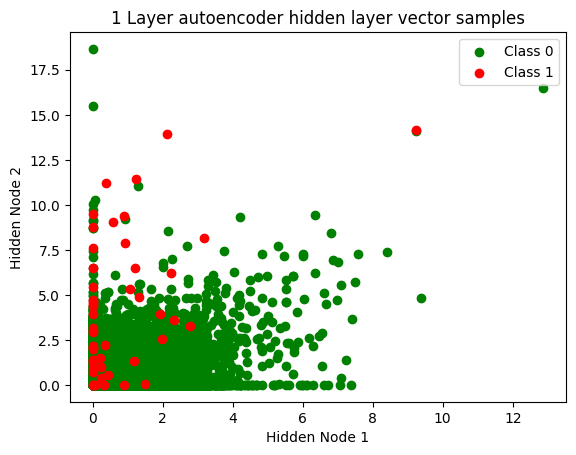

In [18]:
plt.scatter(hidden_layer_vector1[y_test == 0, 0], hidden_layer_vector1[y_test == 0, 1], c='green', label='Class 0')
plt.scatter(hidden_layer_vector1[y_test == 1, 0], hidden_layer_vector1[y_test == 1, 1], c='red', label='Class 1')
plt.title("1 Layer autoencoder hidden layer vector samples")
plt.xlabel("Hidden Node 1")
plt.ylabel("Hidden Node 2")
plt.legend()
plt.show()


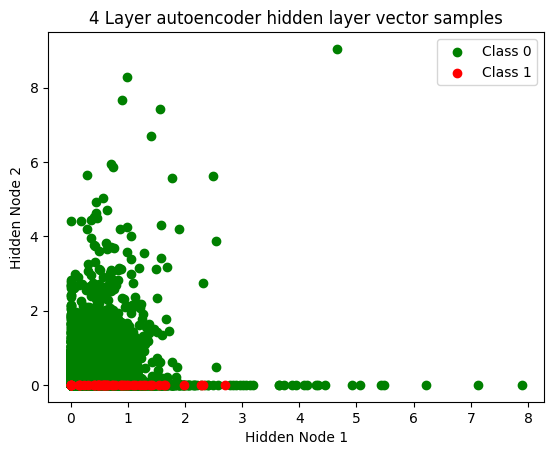

In [19]:
plt.scatter(hidden_layer_vector2[y_test == 0, 0], hidden_layer_vector2[y_test == 0, 1], c='green', label='Class 0')
plt.scatter(hidden_layer_vector2[y_test == 1, 0], hidden_layer_vector2[y_test == 1, 1], c='red', label='Class 1')
plt.title("4 Layer autoencoder hidden layer vector samples")
plt.xlabel("Hidden Node 1")
plt.ylabel("Hidden Node 2")
plt.legend()
plt.show()

# Part III:

# 1


Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_8             │ (None, 28, 28, 1)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 14, 14, 32)     │            320 │ input_layer_8[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 7, 7, 64)       │         18,496 │ conv2d[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten (Flatten)         │ (None, 3136)           │              0 │ conv2d_1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_30 (Dense)          │ (None, 16)             │         50,192 │ flatten[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ z_mean (Dense)            │ (None, 2)              │             34 │ dense_30[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ z_log_var (Dense)         │ (None, 2)              │             34 │ dense_30[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sampling (Sampling)       │ (None, 2)              │              0 │ z_mean[0][0],          │
│                           │                        │                │ z_log_var[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 69,076 (269.83 KB)

 Trainable params: 69,076 (269.83 KB)

 Non-trainable params: 0 (0.00 B)

Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)           │ (None, 2)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 3136)                │           9,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose (Conv2DTranspose)   │ (None, 14, 14, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_1 (Conv2DTranspose) │ (None, 28, 28, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_2 (Conv2DTranspose) │ (None, 28, 28, 1)           │             289 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 65,089 (254.25 KB)

 Trainable params: 65,089 (254.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
547/547 ━━━━━━━━━━━━━━━━━━━━ 105s 188ms/step - kl_loss: 3.0204 - loss: 248.4866 - reconstruction_loss: 245.4662
Epoch 2/30
547/547 ━━━━━━━━━━━━━━━━━━━━ 102s 187ms/step - kl_loss: 4.7051 - loss: 168.8226 - reconstruction_loss: 164.1175
Epoch 3/30
547/547 ━━━━━━━━━━━━━━━━━━━━ 101s 185ms/step - kl_loss: 5.1895 - loss: 161.3876 - reconstruction_loss: 156.1981
Epoch 4/30
547/547 ━━━━━━━━━━━━━━━━━━━━ 100s 182ms/step - kl_loss: 5.4288 - loss: 158.9298 - reconstruction_loss: 153.5010
Epoch 5/30
547/547 ━━━━━━━━━━━━━━━━━━━━ 144s 185ms/step - kl_loss: 5.5207 - loss: 156.5270 - reconstruction_loss: 151.0063
Epoch 6/30
547/547 ━━━━━━━━━━━━━━━━━━━━ 143s 187ms/step - kl_loss: 5.6732 - loss: 155.2028 - reconstruction_loss: 149.5296
Epoch 7/30
547/547 ━━━━━━━━━━━━━━━━━━━━ 139s 182ms/step - kl_loss: 5.7442 - loss: 153.9770 - reconstruction_loss: 148.2328
Epoch 8/30
547/547 ━━━━━━━━━━━━━━━━━━━━ 140s 179ms/step - kl_loss: 5.8340 - loss: 153.5609 - reconstruction_loss: 147.7269
Epoch 9/30
547/5

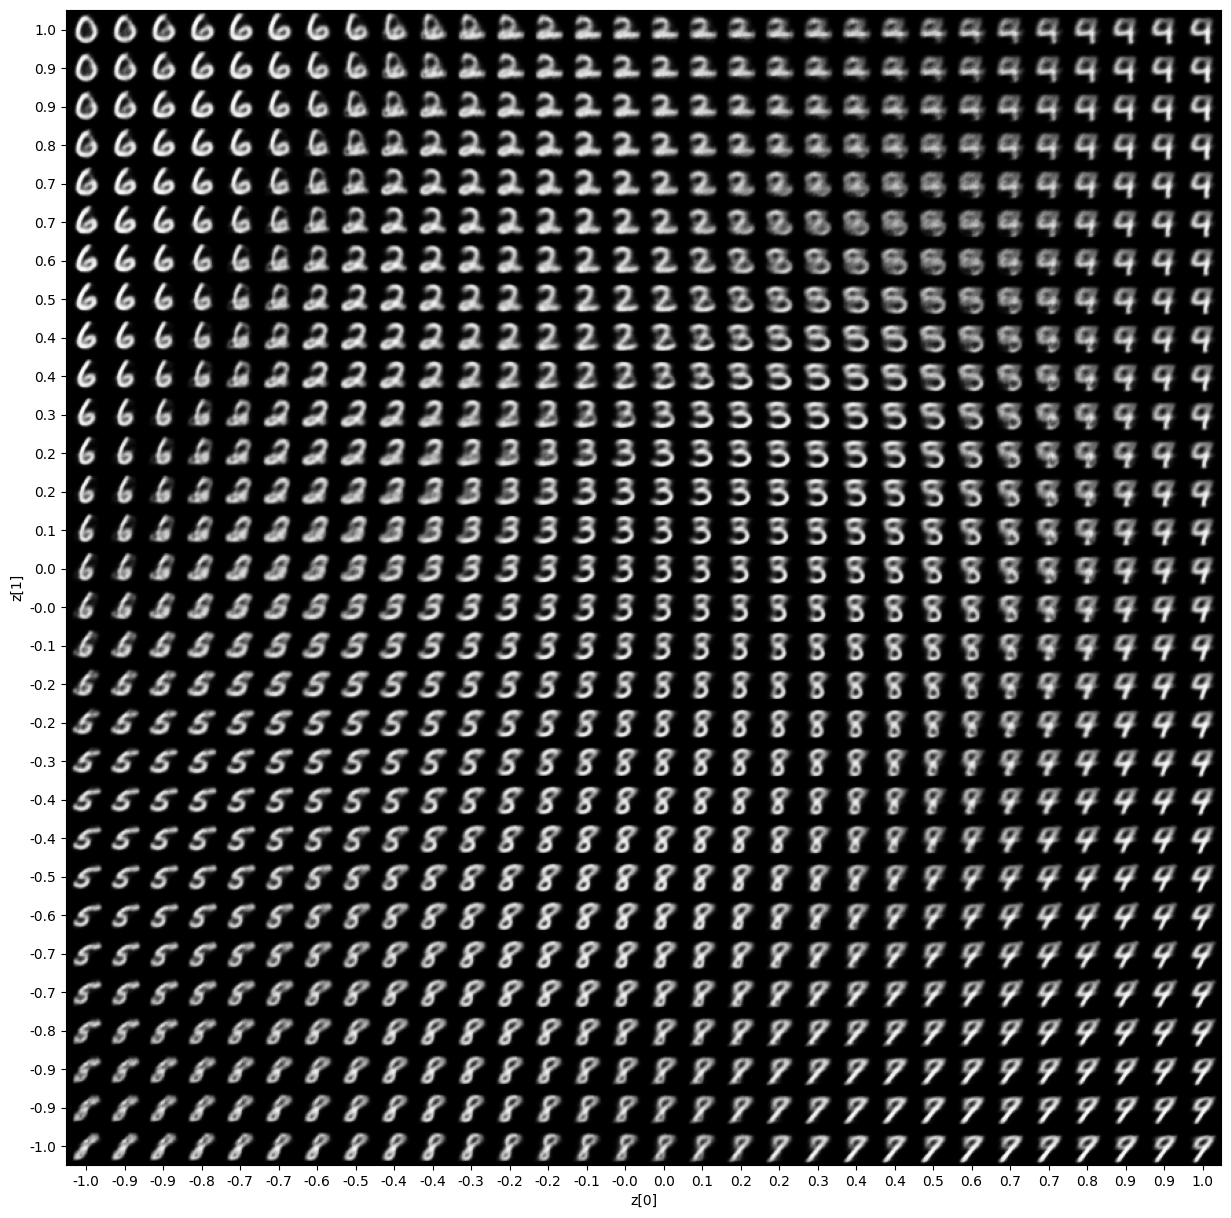

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step


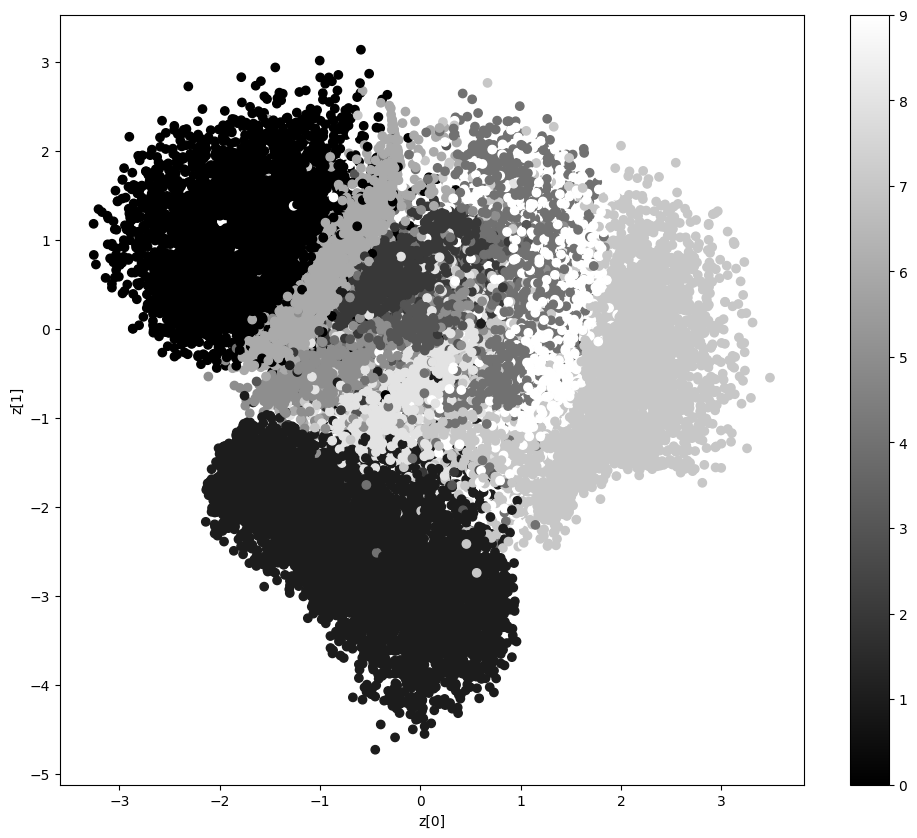

In [20]:
"""
Title: Variational AutoEncoder
Author: [fchollet](https://twitter.com/fchollet)
Date created: 2020/05/03
Last modified: 2020/05/03
Description: Convolutional Variational AutoEncoder (VAE) trained on MNIST digits.
Accelerator: GPU
"""

"""
## Setup
"""

import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

"""
## Create a sampling layer
"""


class Sampling(layers.Layer):
    """Uses (z_mean, z_log_var) to sample z, the vector encoding a digit."""

    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon


"""
## Build the encoder
"""

latent_dim = 2

encoder_inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(32, 3, activation="relu", strides=2, padding="same")(encoder_inputs)
x = layers.Conv2D(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Flatten()(x)
x = layers.Dense(16, activation="relu")(x)
z_mean = layers.Dense(latent_dim, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)
z = Sampling()([z_mean, z_log_var])
encoder = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")
encoder.summary()

"""
## Build the decoder
"""

latent_inputs = keras.Input(shape=(latent_dim,))
x = layers.Dense(7 * 7 * 64, activation="relu")(latent_inputs)
x = layers.Reshape((7, 7, 64))(x)
x = layers.Conv2DTranspose(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Conv2DTranspose(32, 3, activation="relu", strides=2, padding="same")(x)
decoder_outputs = layers.Conv2DTranspose(1, 3, activation="sigmoid", padding="same")(x)
decoder = keras.Model(latent_inputs, decoder_outputs, name="decoder")
decoder.summary()

"""
## Define the VAE as a `Model` with a custom `train_step`
"""


class VAE(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super().__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.total_loss_tracker = keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = keras.metrics.Mean(
            name="reconstruction_loss"
        )
        self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")

    @property
    def metrics(self):
        return [
            self.total_loss_tracker,
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
        ]

    def train_step(self, data):
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data)
            reconstruction = self.decoder(z)
            reconstruction_loss = tf.reduce_mean(
                tf.reduce_sum(
                    keras.losses.binary_crossentropy(data, reconstruction), axis=(1, 2)
                )
            )
            kl_loss = -0.5 * (1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
            kl_loss = tf.reduce_mean(tf.reduce_sum(kl_loss, axis=1))
            total_loss = reconstruction_loss + kl_loss
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }


"""
## Train the VAE
"""

(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()
mnist_digits = np.concatenate([x_train, x_test], axis=0)
mnist_digits = np.expand_dims(mnist_digits, -1).astype("float32") / 255

vae = VAE(encoder, decoder)
vae.compile(optimizer=keras.optimizers.Adam())
vae.fit(mnist_digits, epochs=30, batch_size=128)

"""
## Display a grid of sampled digits
"""

import matplotlib.pyplot as plt


def plot_latent_space(vae, n=30, figsize=15):
    # display a n*n 2D manifold of digits
    digit_size = 28
    scale = 1.0
    figure = np.zeros((digit_size * n, digit_size * n))
    # linearly spaced coordinates corresponding to the 2D plot
    # of digit classes in the latent space
    grid_x = np.linspace(-scale, scale, n)
    grid_y = np.linspace(-scale, scale, n)[::-1]

    for i, yi in enumerate(grid_y):
        for j, xi in enumerate(grid_x):
            z_sample = np.array([[xi, yi]])
            x_decoded = vae.decoder.predict(z_sample)
            digit = x_decoded[0].reshape(digit_size, digit_size)
            figure[
                i * digit_size : (i + 1) * digit_size,
                j * digit_size : (j + 1) * digit_size,
            ] = digit

    plt.figure(figsize=(figsize, figsize))
    start_range = digit_size // 2
    end_range = n * digit_size + start_range
    pixel_range = np.arange(start_range, end_range, digit_size)
    sample_range_x = np.round(grid_x, 1)
    sample_range_y = np.round(grid_y, 1)
    plt.xticks(pixel_range, sample_range_x)
    plt.yticks(pixel_range, sample_range_y)
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.imshow(figure, cmap="Greys_r")
    plt.show()


plot_latent_space(vae)

"""
## Display how the latent space clusters different digit classes
"""


def plot_label_clusters(vae, data, labels):
    # display a 2D plot of the digit classes in the latent space
    z_mean, _, _ = vae.encoder.predict(data)
    plt.figure(figsize=(12, 10))
    plt.scatter(z_mean[:, 0], z_mean[:, 1], c=labels)
    plt.colorbar()
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.show()


(x_train, y_train), _ = keras.datasets.mnist.load_data()
x_train = np.expand_dims(x_train, -1).astype("float32") / 255

plot_label_clusters(vae, x_train, y_train)

# 2

Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_12            │ (None, 28, 28, 1)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 14, 14, 32)     │            320 │ input_layer_12[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_5 (Conv2D)         │ (None, 7, 7, 64)       │         18,496 │ conv2d_4[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_2 (Flatten)       │ (None, 3136)           │              0 │ conv2d_5[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_39 (Dense)          │ (None, 784)            │      2,459,408 │ flatten_2[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_40 (Dense)          │ (None, 512)            │        401,920 │ dense_39[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_41 (Dense)          │ (None, 64)             │         32,832 │ dense_40[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ z_mean (Dense)            │ (None, 2)              │            130 │ dense_41[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ z_log_var (Dense)         │ (None, 2)              │            130 │ dense_41[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sampling_2 (Sampling)     │ (None, 2)              │              0 │ z_mean[0][0],          │
│                           │                        │                │ z_log_var[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 2,913,236 (11.11 MB)

 Trainable params: 2,913,236 (11.11 MB)

 Non-trainable params: 0 (0.00 B)

Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_13 (InputLayer)          │ (None, 2)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_42 (Dense)                     │ (None, 64)                  │             192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_43 (Dense)                     │ (None, 512)                 │          33,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_44 (Dense)                     │ (None, 784)                 │         402,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_45 (Dense)                     │ (None, 3136)                │       2,461,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_2 (Reshape)                  │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_6 (Conv2DTranspose) │ (None, 14, 14, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_7 (Conv2DTranspose) │ (None, 28, 28, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_8 (Conv2DTranspose) │ (None, 28, 28, 1)           │             289 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,953,105 (11.27 MB)

 Trainable params: 2,953,105 (11.27 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
547/547 ━━━━━━━━━━━━━━━━━━━━ 207s 368ms/step - kl_loss: 1.6190 - loss: 226.0946 - reconstruction_loss: 224.4756
Epoch 2/30
547/547 ━━━━━━━━━━━━━━━━━━━━ 204s 371ms/step - kl_loss: 5.0564 - loss: 160.8985 - reconstruction_loss: 155.8421
Epoch 3/30
547/547 ━━━━━━━━━━━━━━━━━━━━ 258s 364ms/step - kl_loss: 5.8253 - loss: 150.4951 - reconstruction_loss: 144.6698
Epoch 4/30
547/547 ━━━━━━━━━━━━━━━━━━━━ 198s 362ms/step - kl_loss: 6.0885 - loss: 147.2776 - reconstruction_loss: 141.1890
Epoch 5/30
547/547 ━━━━━━━━━━━━━━━━━━━━ 201s 359ms/step - kl_loss: 6.2897 - loss: 144.9561 - reconstruction_loss: 138.6664
Epoch 6/30
547/547 ━━━━━━━━━━━━━━━━━━━━ 196s 359ms/step - kl_loss: 6.3931 - loss: 143.5417 - reconstruction_loss: 137.1486
Epoch 7/30
547/547 ━━━━━━━━━━━━━━━━━━━━ 204s 362ms/step - kl_loss: 6.4870 - loss: 142.2119 - reconstruction_loss: 135.7248
Epoch 8/30
547/547 ━━━━━━━━━━━━━━━━━━━━ 202s 362ms/step - kl_loss: 6.5826 - loss: 141.1914 - reconstruction_loss: 134.6088
Epoch 9/30
547/5

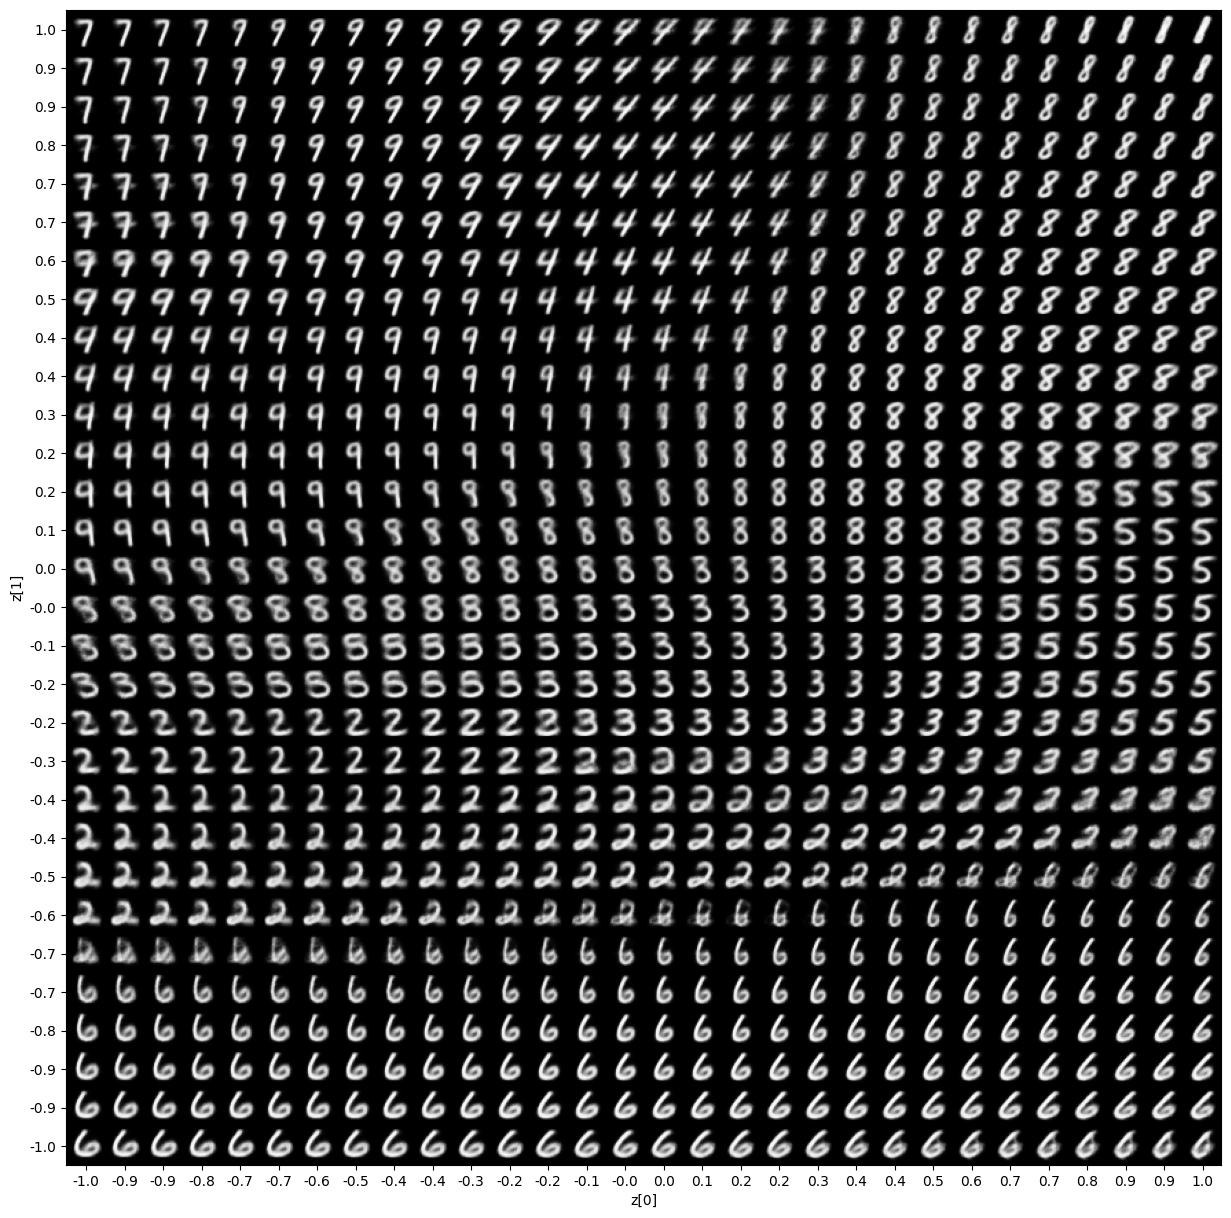

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 17ms/step


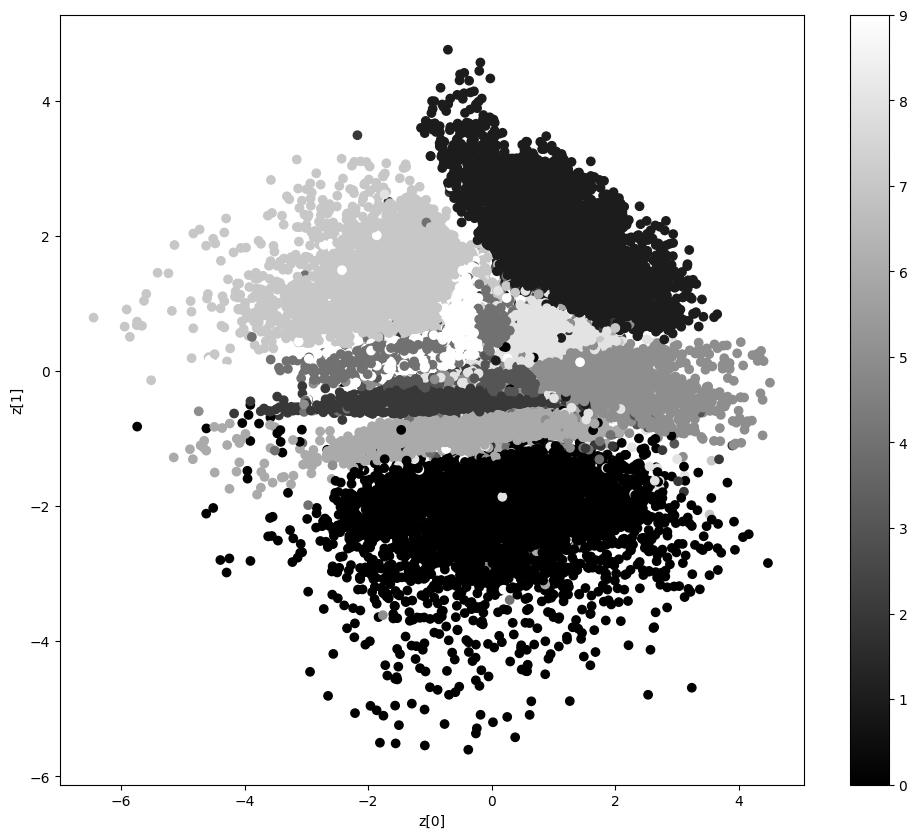

In [22]:

"""
## Build the encoder
"""

latent_dim = 2

encoder_inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(32, 3, activation="relu", strides=2, padding="same")(encoder_inputs)
x = layers.Conv2D(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Flatten()(x)
x = layers.Dense(784, activation="relu")(x)
x = layers.Dense(512, activation="relu")(x)
x = layers.Dense(64, activation="relu")(x)
z_mean = layers.Dense(latent_dim, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)
z = Sampling()([z_mean, z_log_var])
encoder = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")
encoder.summary()

"""
## Build the decoder
"""

latent_inputs = keras.Input(shape=(latent_dim,))
x = layers.Dense(64, activation="relu")(latent_inputs)
x = layers.Dense(512, activation="relu")(x)
x = layers.Dense(784, activation="relu")(x)
x = layers.Dense(7 * 7 * 64, activation="relu")(x)
x = layers.Reshape((7, 7, 64))(x)
x = layers.Conv2DTranspose(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Conv2DTranspose(32, 3, activation="relu", strides=2, padding="same")(x)
decoder_outputs = layers.Conv2DTranspose(1, 3, activation="sigmoid", padding="same")(x)
decoder = keras.Model(latent_inputs, decoder_outputs, name="decoder")
decoder.summary()


"""
## Train the VAE
"""

(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()
mnist_digits = np.concatenate([x_train, x_test], axis=0)
mnist_digits = np.expand_dims(mnist_digits, -1).astype("float32") / 255

vae = VAE(encoder, decoder)
vae.compile(optimizer=keras.optimizers.Adam())
vae.fit(mnist_digits, epochs=30, batch_size=128)


plot_latent_space(vae)

(x_train, y_train), _ = keras.datasets.mnist.load_data()
x_train = np.expand_dims(x_train, -1).astype("float32") / 255

plot_label_clusters(vae, x_train, y_train)

The first VAE model comes from the VariationalAutoEncoder_demo2.py file. The second model adds more dense layers after the flatten layer for the encoder and before the Dense(7*7*64) layer in the decoder. The layers added are Dense layers of value 784, 512, and 64 to meet the requirements in the hw assignment. Dense 16 layer was removed for this reason as the dimension reduction should be 784-512-64-2.When comparing the epoch loss values for the different VAE models, k1 loss is slightly higher for the second model but loss and reconstruction loss is lower. This would signify that the model performed better when adding more layers. This could be because the dataset is sufficiently large and can handle the extra model complexity without significant overfitting. Although there may be some overfitting due to higher k1_loss error. The latent spaces appear similar in the sense of which digits are similar with 7 similar to 9. 2 to 6, 9 to 4, 8 to 5 and so on. Therefore it appears both models are able to uncover similar trends and patterns in the data but the second is more accurate in reconstructions. The laten spaces are however in different locations from each other. Overall based on the lower reconstruction loss and loss values the second model performs better with the extra dense layers for this dataset.